In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.street.value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

In [6]:
pd.options.display.float_format = '{:,.1f}'.format
df.price = df.price.astype(float)

In [7]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313,000.0",3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"2,384,000.0",5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"342,000.0",3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"420,000.0",3.0,2.2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"550,000.0",4.0,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,"308,166.7",3.0,1.8,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,"534,333.3",3.0,2.5,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,"416,904.2",3.0,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,"203,400.0",4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<AxesSubplot:>

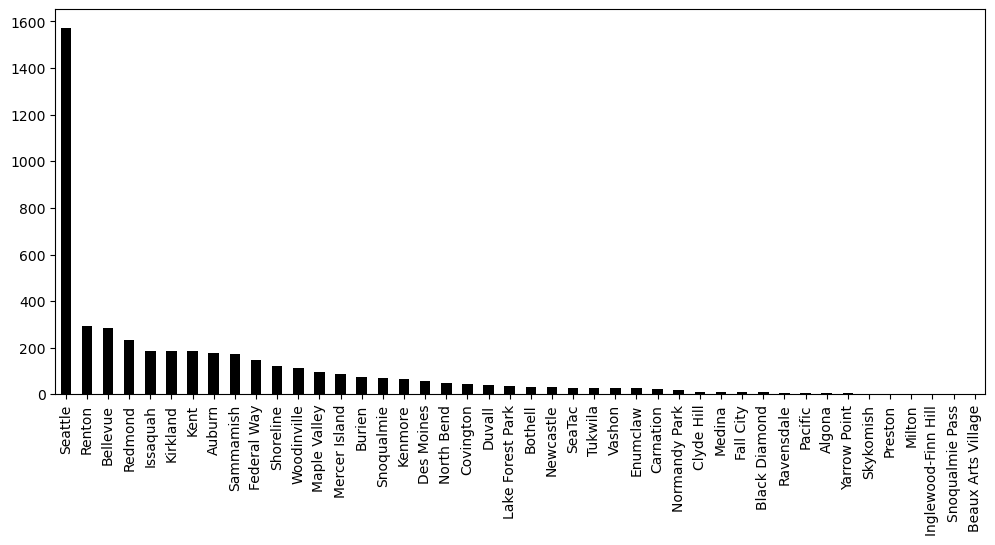

In [9]:
df.city.value_counts().plot(kind = "bar" , figsize =(12 , 5) , color = "Black")

<AxesSubplot:xlabel='city'>

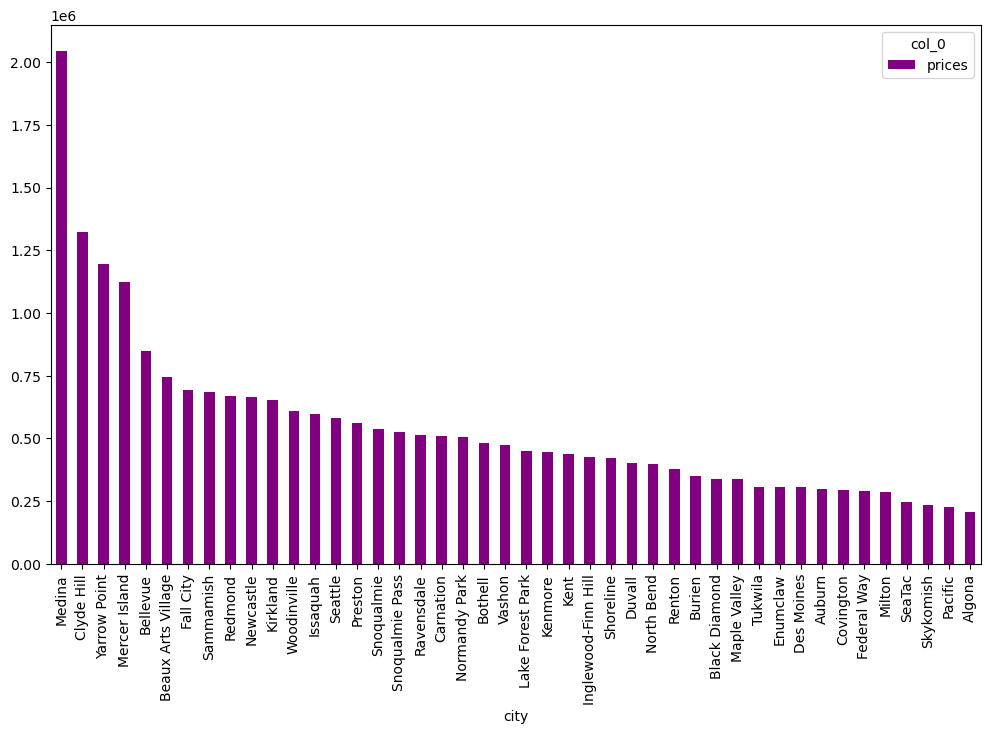

In [10]:
pd.crosstab(index = df.city , columns = "prices" , values = df.price , aggfunc = "mean").sort_values(ascending  = False , by = "prices").plot(kind = "bar" , figsize = (12,7) , color = "purple")

In [11]:
df[["price" , "bedrooms" , "bathrooms" , "sqft_living" , "sqft_lot" , "floors", "waterfront" , "view" ,"condition" , "sqft_basement"]].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement
price,1.0,0.2,0.3,0.4,0.1,0.2,0.1,0.2,0.0,0.2
bedrooms,0.2,1.0,0.5,0.6,0.1,0.2,-0.0,0.1,0.0,0.3
bathrooms,0.3,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.3
sqft_living,0.4,0.6,0.8,1.0,0.2,0.3,0.1,0.3,-0.1,0.4
sqft_lot,0.1,0.1,0.1,0.2,1.0,0.0,0.0,0.1,0.0,0.0
floors,0.2,0.2,0.5,0.3,0.0,1.0,0.0,0.0,-0.3,-0.3
waterfront,0.1,-0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1
view,0.2,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.1,0.3
condition,0.0,0.0,-0.1,-0.1,0.0,-0.3,0.0,0.1,1.0,0.2
sqft_basement,0.2,0.3,0.3,0.4,0.0,-0.3,0.1,0.3,0.2,1.0


In [12]:
pd.crosstab(index = df.condition , values  = df.price , columns = "Price",aggfunc = "mean")

col_0,Price
condition,
1,"306,633.3"
2,"324,373.8"
3,"550,111.5"
4,"533,647.3"
5,"637,041.3"


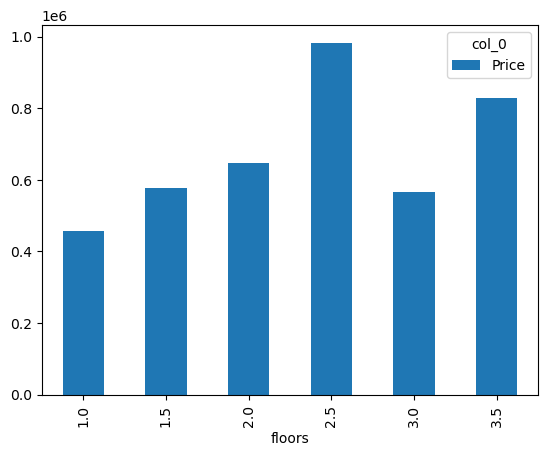

In [13]:
result = pd.crosstab(index = df.floors , values  = df.price , columns = "Price",aggfunc = "mean").plot(kind = "bar")

In [14]:
df.waterfront.value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [15]:
pd.crosstab(index = df.waterfront , values  = df.price , columns = "Price",aggfunc = "mean")

col_0,Price
waterfront,
0,"545,462.3"
1,"1,451,621.2"


In [16]:
x  = LabelEncoder()
df["street"] = x.fit_transform(df["street" ] )
df["city"] = x.fit_transform(df["city" ] )
df["statezip"] = x.fit_transform(df["statezip" ] )
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313,000.0",3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,USA
1,2014-05-02 00:00:00,"2,384,000.0",5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,USA
2,2014-05-02 00:00:00,"342,000.0",3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,USA
3,2014-05-02 00:00:00,"420,000.0",3.0,2.2,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,USA
4,2014-05-02 00:00:00,"550,000.0",4.0,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,"308,166.7",3.0,1.8,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,USA
4596,2014-07-09 00:00:00,"534,333.3",3.0,2.5,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,USA
4597,2014-07-09 00:00:00,"416,904.2",3.0,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,USA
4598,2014-07-10 00:00:00,"203,400.0",4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,USA


In [17]:
df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [18]:
df = df.drop(["date" , "statezip" , "country"], axis = 1)

In [19]:
x = df.drop("price" , axis = "columns")
y = df.price
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36
1,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35
2,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18
3,3.0,2.2,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3
4,4.0,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.8,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35
4596,3.0,2.5,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3
4597,3.0,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32
4598,4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35


In [20]:
s = StandardScaler()
x[["sqft_living" ,"sqft_lot" , "sqft_above" , "sqft_basement" ]] = s.fit_transform(x[["sqft_living" ,"sqft_lot" , "sqft_above" , "sqft_basement" ]])
y  = s.fit_transform(y.values.reshape(-1,1))

In [21]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,3.0,1.5,-0.8,-0.2,1.5,0,0,3,-0.6,-0.7,1955,2005,1522,36
1,5.0,2.5,1.6,-0.2,2.0,0,4,5,1.8,-0.1,1921,0,3899,35
2,3.0,2.0,-0.2,-0.1,1.0,0,0,4,0.1,-0.7,1966,0,2291,18
3,3.0,2.2,-0.1,-0.2,1.0,0,0,4,-1.0,1.5,1963,0,4263,3
4,4.0,2.5,-0.2,-0.1,1.0,0,0,4,-0.8,1.1,1976,1992,4352,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.8,-0.7,-0.2,1.0,0,0,4,-0.4,-0.7,1954,1979,3447,35
4596,3.0,2.5,-0.7,-0.2,2.0,0,0,3,-0.4,-0.7,1983,2009,960,3
4597,3.0,2.5,0.9,-0.2,2.0,0,0,3,1.4,-0.7,2009,0,4033,32
4598,4.0,2.0,-0.1,-0.2,1.0,0,0,3,-0.9,1.5,1974,0,3498,35


In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [23]:
model_one = LinearRegression()

In [24]:
model_one.fit(x_train , y_train)

LinearRegression()

In [25]:
model_one.score(x_train, y_train)

0.17385967858662454

In [26]:
model_one.score(x_test, y_test)

0.5381226894209707

In [27]:
model_two = RandomForestRegressor(n_estimators = 400)

In [28]:
model_two.fit(x_train , y_train)

C:\Users\techg\AppData\Local\Temp\ipykernel_1412\895531536.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_two.fit(x_train , y_train)


RandomForestRegressor(n_estimators=400)

In [29]:
model_two.score(x_train, y_train)

0.8848405485660419

In [30]:
model_two.score(x_test, y_test)

0.47019256273546417

In [31]:
model_three =DecisionTreeRegressor(splitter  = "random")
model_three.fit(x_train , y_train)

DecisionTreeRegressor(splitter='random')

In [32]:
model_three.score(x_train , y_train)

0.9999985189525986